## Fake News Classification
### Fake News Classification on WELFake Datase

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [4]:
df.duplicated().sum()

8456

In [5]:
df = df[['title','label']]
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [6]:
df.head()

,title,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1
5,About Time! Christian Group Sues Amazon and SP...,1


In [7]:
df.label.value_counts()

label
0    34409
1    27942
Name: count, dtype: int64

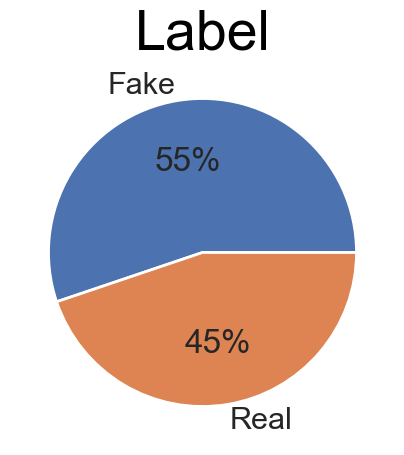

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
labels=['Fake','Real']
values=df['label'].value_counts().values

sns.set_theme(context='poster')
plt.figure(figsize=(5,5))
plt.title('Label', color="Black",fontsize=40)

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.show()

### Text preprocessing begins, key elements to consider;
#### Lowercasing
#### Removing Punctuation & Special Characters
#### removing single character
#### removing multiple spaces
#### Stop-Words Removal
#### Removal of URLs
#### Removal of HTML Tags
#### Stemming & Lemmatization
#### Tokenization
#### Text Normalization

In [9]:
import re
import gensim
from gensim.models import KeyedVectors
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot,Tokenizer
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding

In [10]:
def preprocess_text(sent):
    tag_pattern = re.compile(r'<.*?>')
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Removing Punctuation & Special Characters
    sent = re.sub('[^a-zA-Z]',' ',sent)
    # Removal of HTML Tags
    sent = re.sub(tag_pattern, '', sent)
    # lowercasing
    sent = sent.lower()
    # removing single character
    sent = re.sub(r"\s+[a-zA-Z]\s+",' ',sent)
    # removing multiple spaces
    sent = re.sub(r'\s+',' ',sent)
    # Removal of URLs
    sent = re.sub(url_pattern,'',sent)
    return sent

In [11]:
corpus = list(df['title'])
X = []
for line in corpus:
    X.append(preprocess_text(line))

In [12]:
X

['law enforcement on high alert following threats against cops and whites on by blacklivesmatter and fyf terrorists video ',
 'unbelievable obama attorney general says most charlotte rioters were peaceful protesters in her home state of north carolina video ',
 'bobby jindal raised hindu uses story of christian conversion to woo evangelicals for potential bid',
 'satan russia unvelis an image of its terrifying new supernuke western world takes notice',
 'about time christian group sues amazon and splc for designation as hate group',
 'dr ben carson targeted by the irs never had an audit until spoke at the national prayer breakfast ',
 'house intel chair on trump russia fake story no evidence of anything video ',
 'sports bar owner bans nfl games will show only true american sports d like to speak for rural america video ',
 'latest pipeline leak underscores dangers of dakota access pipeline',
 ' gop senator just smacked down the most punchable alt right nazi on the internet',
 'may bre

In [13]:
y = df.label

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # splitting sentence into tokens
X_train = tokenizer.texts_to_sequences(X_train)# assigning tokens numerical values
X_test = tokenizer.texts_to_sequences(X_test) # assigning tokens numerical values

input_dim = len(tokenizer.word_index) + 1

In [16]:
maxlen = 100
X_train = pad_sequences(X_train,padding='pre',maxlen = maxlen)
X_test = pad_sequences(X_test,padding='pre',maxlen = maxlen)

In [17]:
wv = KeyedVectors.load('C:/Users/odhia/PycharmProjects/Pythonrealproject/word2vec_model.kv')

In [18]:
embedding_matrix = np.zeros((input_dim,200))
for word,index in tokenizer.word_index.items():
    if word in wv:
        embedding_matrix[index] = wv[word]

In [19]:
from keras.layers import Dropout
model = Sequential([
    Embedding(input_dim = input_dim,output_dim = 200,weights = [embedding_matrix],input_length = maxlen,trainable = False),
    Dropout(0.2), # this prevent overfitting
    LSTM(150),
    Dropout(0.2), # this prevent overfitting
    Dense(1,activation = 'sigmoid')
])

In [20]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [21]:
history = model.fit(X_train,y_train,batch_size = 128,epochs = 10, verbose = 1,validation_split = 0.2)

Epoch 1/10


312/312 [==============================] - 113s 301ms/step - loss: 0.3165 - accuracy: 0.8628 - val_loss: 0.2612 - val_accuracy: 0.8892
Epoch 2/10
312/312 [==============================] - 88s 283ms/step - loss: 0.2547 - accuracy: 0.8932 - val_loss: 0.2533 - val_accuracy: 0.8905
Epoch 3/10
312/312 [==============================] - 89s 284ms/step - loss: 0.2296 - accuracy: 0.9053 - val_loss: 0.2252 - val_accuracy: 0.9062
Epoch 4/10
312/312 [==============================] - 89s 286ms/step - loss: 0.2085 - accuracy: 0.9132 - val_loss: 0.2170 - val_accuracy: 0.9085
Epoch 5/10
312/312 [==============================] - 88s 282ms/step - loss: 0.1916 - accuracy: 0.9205 - val_loss: 0.2145 - val_accuracy: 0.9122
Epoch 6/10
312/312 [==============================] - 91s 291ms/step - loss: 0.1808 - accuracy: 0.9253 - val_loss: 0.2140 - val_accuracy: 0.9125
Epoch 7/10
312/312 [==============================] - 90s 288ms/step - loss: 0.1619 - accuracy: 0.9333 - val_loss: 0.2115 - val

In [22]:
model.evaluate(X_test,y_test)

390/390 [==============================] - 14s 36ms/step - loss: 0.2249 - accuracy: 0.9160


[0.2248641699552536, 0.9159650206565857]

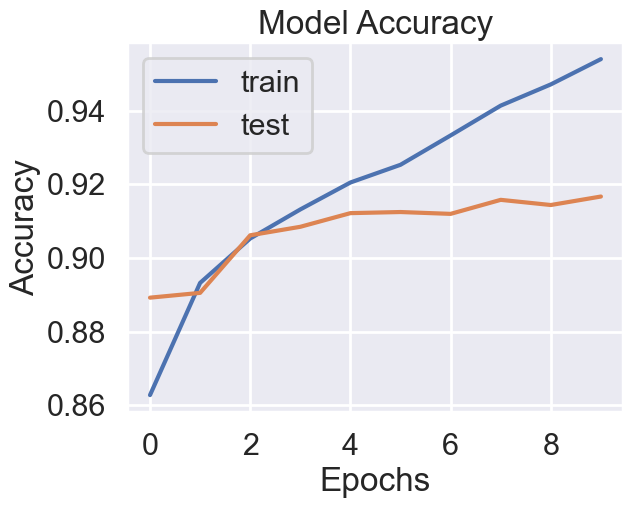

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

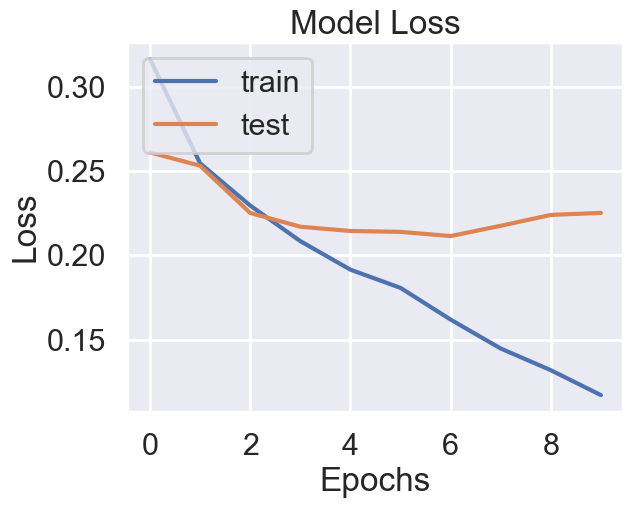

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [25]:
import pickle
pickle.dump(tokenizer,open('newstokenizer.pkl','wb'))
model.save('fakenews.keras')